<a href="https://colab.research.google.com/github/yoav1131/Deep-Learning-Course/blob/main/Gradient_Descent_vs_Stochastic_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gradient Descent vs. Stochastic Gradient Descent**

In this example we compare the convergence profiles of stochastic gradient descent to (full) gradient descent. We will use the basic `numpy` (for calculations) and `matplotlib` (for plotting) packages.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Random seed
np.random.seed(1000)

## Data Generation

To make things tractable and simple to visualize, we consider the fitting of a linear function to data taken from a noisy linear setup.
Mathematically speaking, our data is generated from the following relationship:
\begin{equation}
s_t = \alpha \cdot x_t + n_t,
\end{equation}
where the input $x_t$ is uniformly distributed over $[0,1]$, and $n_t$ is additive Gaussian noise with mean value $\mu$ and variance $\sigma^2$.

In [ ]:
data_size = 500
alpha = 1.8
mu = 1
sigma = 1
# Creating the synthetic data set
x_train = np.random.rand(data_size, 1)
s_train = mu + alpha * x_train + sigma*np.random.randn(data_size, 1)

Let's see what this data looks like:



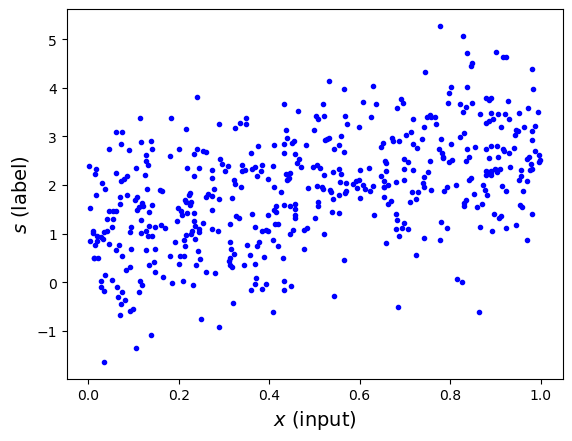

In [ ]:
plt.plot(x_train, s_train, "b.")


plt.xlabel("$x$ (input)", fontsize=14)
plt.ylabel("$s$ (label)", rotation=90, fontsize=14)
plt.show()

## Parametric Model
We are training a simple linear model, which is given by:
\begin{equation}
f_{\boldsymbol{\theta}}= w_1 x + w_0, \qquad \boldsymbol{\theta} = [w_0, w_1].
\end{equation}
We use the squared-error loss, i.e.,
\begin{align}
l_{\rm mse}(f_{\boldsymbol{\theta}}, x, s) &= (s - f_{\boldsymbol{\theta}})^2 \\ &=  (s - w_1 x - w_0)^2.
\end{align}

In this case, the following function computes the average loss over a data set $\mathcal{D}$ stored in the vectors `x_data` and `s_data`:


In [ ]:
def ErrorForLinearReg(w0, w1, x_data,s_data):
    total_Error = 0
    for i in range(0, len(x_data)):
        total_Error += (s_data[i] - (w1 * x_data[i]+ w0)) ** 2
    return total_Error / float(len(x_data))

Let's see what this loss surface look like when taken over the entire data set:

Text(0.5, 1.0, 'Loss surface')

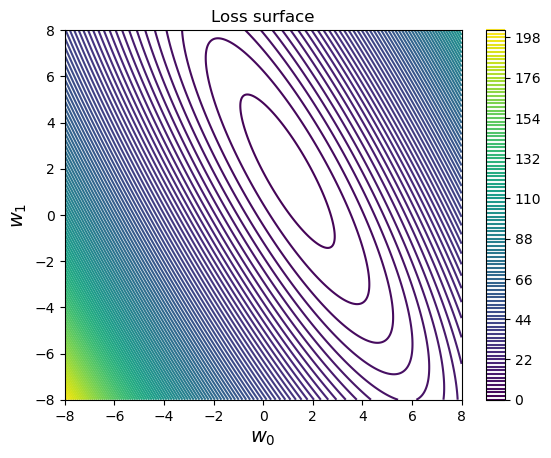

In [ ]:
# Generate grid of [w_0, w_1] values
w0=np.linspace(-8,8,1000)
w1=np.linspace(-8,8,1000)
X, Y = np.meshgrid(w0, w1)
# Compute loss for each grid point
Z = ErrorForLinearReg(X, Y,x_train, s_train)
plt.contour(X, Y, Z,100)
plt.colorbar()
plt.xlabel("$w_0$", fontsize=14)
plt.ylabel("$w_1$", rotation=90, fontsize=14)
plt.title('Loss surface')

# Full Gradient Descent
We train the model using 40 iterations of full gradient descent.
Let us first compute the gradients:
\begin{align}
\frac{\partial}{\partial w_0}l_{\rm mse}(f_{\boldsymbol{\theta}}, x, s) &= 2(w_1 x + w_0 - s), \\
\frac{\partial}{\partial w_1}l_{\rm mse}(f_{\boldsymbol{\theta}}, x, s) &= 2x(w_1 x + w_0 - s),
\end{align}
which can be written as
\begin{equation}
\nabla_{\boldsymbol{\theta}}l_{\rm mse}(f_{\boldsymbol{\theta}}, x, s)=  2[1, \, x]^T ([1, \, x] [w_0, \, w_1]^T- s) = 2[1, \, x]^T ([1, \, x] {{\boldsymbol \theta}}-s).
\end{equation}

This boils down to the following function:

In [ ]:
def LossGradient(W, x_data, s_data):
  xi = np.c_[np.ones(len(x_data)),x_data]  #padding x_train with ones
  return 2 * xi.T.dot(xi.dot(W) - s_data)/len(s_data)

Also, let's use a learning rate which decays from $0.05$ to $\sim 0.02$, as defined in the following function:

In [ ]:
# Get learning rate for ieration j
def learning_schedule(j):
    return  1 / (0.1*j + 20)

We can now run gradient descent, starting with random weights:


In [ ]:
W0 = 0.05 * np.random.randn(2,1)
n_epochs = 40

WGD = W0
WtrajectoryGD = np.array(W0)

# Since each epoch is an iteration, we are using more epochs here
for j in range(10*n_epochs):
  # Get learning rate
  LearningRate = learning_schedule(j)
  # GD update rul
  WGD = WGD - LearningRate * LossGradient(WGD,x_train, s_train)
  # saving the trajectory to be visulalized later
  WtrajectoryGD=np.hstack((WtrajectoryGD,WGD))
  print('Loss at epoch ',j, ' is ', ErrorForLinearReg(WGD[0], WGD[1], x_train,s_train))

Loss at epoch  0  is  [3.97518467]
Loss at epoch  1  is  [3.3011462]
Loss at epoch  2  is  [2.7871659]
Loss at epoch  3  is  [2.39460333]
Loss at epoch  4  is  [2.09428199]
Loss at epoch  5  is  [1.86413877]
Loss at epoch  6  is  [1.68746526]
Loss at epoch  7  is  [1.5515898]
Loss at epoch  8  is  [1.44688844]
Loss at epoch  9  is  [1.36604148]
Loss at epoch  10  is  [1.303474]
Loss at epoch  11  is  [1.25493398]
Loss at epoch  12  is  [1.21717395]
Loss at epoch  13  is  [1.18771021]
Loss at epoch  14  is  [1.16464067]
Loss at epoch  15  is  [1.14650666]
Loss at epoch  16  is  [1.13218808]
Loss at epoch  17  is  [1.12082364]
Loss at epoch  18  is  [1.11175022]
Loss at epoch  19  is  [1.10445659]
Loss at epoch  20  is  [1.09854807]
Loss at epoch  21  is  [1.09371961]
Loss at epoch  22  is  [1.08973508]
Loss at epoch  23  is  [1.08641149]
Loss at epoch  24  is  [1.08360682]
Loss at epoch  25  is  [1.08121072]
Loss at epoch  26  is  [1.07913731]
Loss at epoch  27  is  [1.07731966]
Loss at

Let's see what the model we learned looks like:

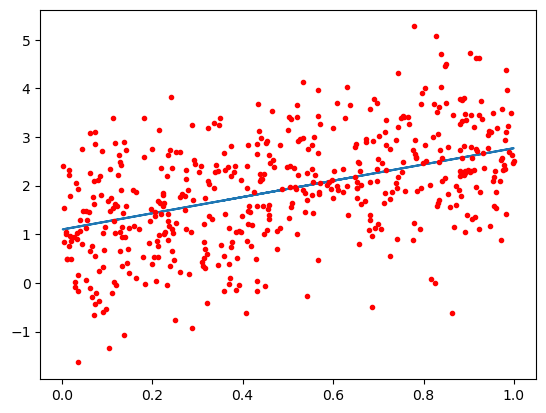

In [ ]:
# Compute model outputs
s_hat = WGD[1] * x_train + WGD[0]
# Visulize fitting of data
plt.plot(x_train, s_hat)
plt.plot(x_train, s_train, "r.")

# Stochastic Gradient Descent
Now let's train the model using stochastic gradient descent. To that aim, we define the following function:

In [ ]:
def SGD(W0, x_train, s_train, minibatch_size, n_epochs):

  WSGD = W0
  WtrajectorySGD=np.array(W0)

  for j in range(n_epochs):
    # Get learning rate
    LearningRate = learning_schedule(j)
    # Shuffle the data in a random manner
    p = np.random.permutation(len(x_train))
    x_train = x_train[p]
    s_train = s_train[p]
    # Loop over data in each epoch
    for i in range(0, s_train.shape[0], minibatch_size):
      xi = x_train[i:i+minibatch_size]
      si = s_train[i:i+minibatch_size]
      # SGD update rule
      WSGD = WSGD - LearningRate * LossGradient(WSGD,xi, si)

    # saving the trajectory to be visulalized later
    WtrajectorySGD=np.hstack((WtrajectorySGD,WSGD))
    print('Loss at epoch ',j, ' is ', ErrorForLinearReg(WSGD[0], WSGD[1], x_train,s_train))

  return WSGD, WtrajectorySGD

We can now run it with mini-batch size 1:

In [ ]:
WSGD, WtrajectorySGD = SGD(W0, x_train, s_train, 1, n_epochs)

Loss at epoch  0  is  [1.07767749]
Loss at epoch  1  is  [1.02585475]
Loss at epoch  2  is  [1.01344279]
Loss at epoch  3  is  [1.05367504]
Loss at epoch  4  is  [1.01837151]
Loss at epoch  5  is  [1.01377956]
Loss at epoch  6  is  [1.01789068]
Loss at epoch  7  is  [1.00654463]
Loss at epoch  8  is  [1.01295087]
Loss at epoch  9  is  [1.00334559]
Loss at epoch  10  is  [1.0073194]
Loss at epoch  11  is  [1.0130037]
Loss at epoch  12  is  [1.04027167]
Loss at epoch  13  is  [1.03305327]
Loss at epoch  14  is  [1.10157851]
Loss at epoch  15  is  [1.02638163]
Loss at epoch  16  is  [1.01368216]
Loss at epoch  17  is  [1.00207376]
Loss at epoch  18  is  [1.05715717]
Loss at epoch  19  is  [1.06994237]
Loss at epoch  20  is  [1.02049197]
Loss at epoch  21  is  [1.04319723]
Loss at epoch  22  is  [1.01518199]
Loss at epoch  23  is  [1.001839]
Loss at epoch  24  is  [1.03330229]
Loss at epoch  25  is  [1.01786848]
Loss at epoch  26  is  [1.00115287]
Loss at epoch  27  is  [1.0039352]
Loss at

And with mini-batch size of 20:

In [ ]:
WMB_SGD, WtrajectoryMB_SGD = SGD(W0, x_train, s_train, 20, n_epochs)

Loss at epoch  0  is  [1.08043055]
Loss at epoch  1  is  [1.05305627]
Loss at epoch  2  is  [1.04185289]
Loss at epoch  3  is  [1.02663828]
Loss at epoch  4  is  [1.01850575]
Loss at epoch  5  is  [1.0126815]
Loss at epoch  6  is  [1.01222552]
Loss at epoch  7  is  [1.00854496]
Loss at epoch  8  is  [1.00722124]
Loss at epoch  9  is  [1.0059132]
Loss at epoch  10  is  [1.00397113]
Loss at epoch  11  is  [1.02183211]
Loss at epoch  12  is  [1.00463572]
Loss at epoch  13  is  [1.00279876]
Loss at epoch  14  is  [1.00305671]
Loss at epoch  15  is  [1.00594573]
Loss at epoch  16  is  [1.0039348]
Loss at epoch  17  is  [1.00137218]
Loss at epoch  18  is  [1.00268722]
Loss at epoch  19  is  [1.00166709]
Loss at epoch  20  is  [1.00250641]
Loss at epoch  21  is  [1.00145456]
Loss at epoch  22  is  [1.0161033]
Loss at epoch  23  is  [1.00418414]
Loss at epoch  24  is  [1.00128004]
Loss at epoch  25  is  [1.00118234]
Loss at epoch  26  is  [1.00128597]
Loss at epoch  27  is  [1.00352075]
Loss a

Let's see what the models learned look like:

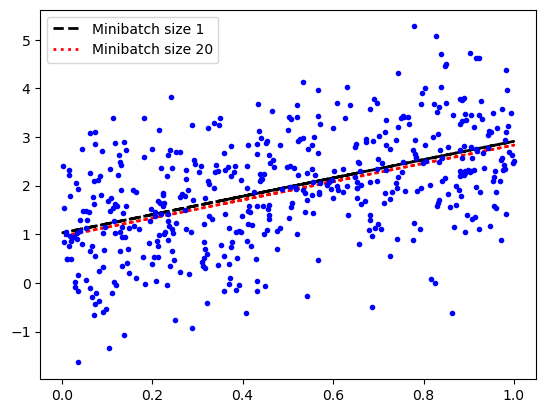

In [ ]:
# Compute model outputs
s_hatSGD = WSGD[1] * x_train + WSGD[0]
s_hatMB_SGD = WMB_SGD[1] * x_train + WMB_SGD[0]
# Visulize fitting of data
plt.plot(x_train,s_hatSGD,"k--", label='Minibatch size 1', linewidth=2)
plt.plot(x_train,s_hatMB_SGD,"r:", label='Minibatch size 20', linewidth=2)
plt.plot(x_train,s_train,"b.")
plt.legend()

Now let's compare the trajectories on the loss surface:

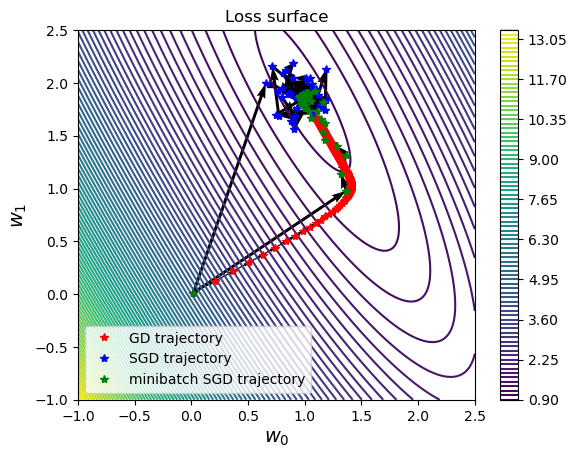

In [ ]:
# Generate grid of [w_0, w_1] values
w0=np.linspace(-1,2.5,1000)
w1=np.linspace(-1,2.5,1000)
X, Y = np.meshgrid(w0, w1)
# Compute loss for each grid point
Z = ErrorForLinearReg(X, Y,x_train, s_train)
# Loss surface:
plt.contour(X, Y, Z,100)
plt.colorbar()
plt.xlabel("$w_0$", fontsize=14)
plt.ylabel("$w_1$", rotation=90, fontsize=14)
plt.title('Loss surface')

# Trajectories:
plt.plot(WtrajectoryGD[0,:],WtrajectoryGD[1,:],'r*',label='GD trajectory')
plt.quiver(WtrajectoryGD[0,:-1], WtrajectoryGD[1,:-1], WtrajectoryGD[0,1:]-WtrajectoryGD[0,:-1], WtrajectoryGD[1,1:]-WtrajectoryGD[1,:-1], scale_units='xy', angles='xy', scale=1)

plt.plot(WtrajectorySGD[0,:],WtrajectorySGD[1,:],'b*',label='SGD trajectory')
plt.quiver(WtrajectorySGD[0,:-1], WtrajectorySGD[1,:-1], WtrajectorySGD[0,1:]-WtrajectorySGD[0,:-1], WtrajectorySGD[1,1:]-WtrajectorySGD[1,:-1], scale_units='xy', angles='xy', scale=1)

plt.plot(WtrajectoryMB_SGD[0,:],WtrajectoryMB_SGD[1,:],'g*',label='minibatch SGD trajectory')
plt.quiver(WtrajectoryMB_SGD[0,:-1], WtrajectoryMB_SGD[1,:-1], WtrajectoryMB_SGD[0,1:]-WtrajectoryMB_SGD[0,:-1], WtrajectoryMB_SGD[1,1:]-WtrajectoryMB_SGD[1,:-1], scale_units='xy', angles='xy', scale=1)
plt.legend()